CS4001/4042 Assignment 1
---
Part B, Q1 (15 marks)
---

Real world datasets often have a mix of numeric and categorical features – this dataset is one example. To build models on such data, categorical features have to be encoded or embedded.

PyTorch Tabular is a library that makes it very convenient to build neural networks for tabular data. It is built on top of PyTorch Lightning, which abstracts away boilerplate model training code and makes it easy to integrate other tools, e.g. TensorBoard for experiment tracking.

For questions B1 and B2, the following features should be used:   
- **Numeric / Continuous** features: dist_to_nearest_stn, dist_to_dhoby, degree_centrality, eigenvector_centrality, remaining_lease_years, floor_area_sqm
- **Categorical** features: month, town, flat_model_type, storey_range



---



In [11]:
pip install pytorch_tabular[extra] --user

Note: you may need to restart the kernel to use updated packages.


In [12]:
SEED = 42

import os

import random
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import pandas as pd

from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import (
    DataConfig,
    OptimizerConfig,
    TrainerConfig,
)

> Divide the dataset (‘hdb_price_prediction.csv’) into train and test sets by using entries from year 2020 and before as training data, and year 2021 as test data (validation set is not required).
**Do not** use data from year 2022 and year 2023.



In [13]:
df = pd.read_csv('hdb_price_prediction.csv')
#data cleaning with the requiremnts of the ques
train_df = df[df["year"] <= 2019]
val_df = df[df["year"] == 2020]
test_df = df[df["year"] == 2021]

In [14]:
train_df

,month,year,town,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price
0,1,2017,ANG MO KIO,406 ANG MO KIO AVENUE 10,Ang Mo Kio,1.007264,7.006044,0.016807,0.006243,"2 ROOM, Improved",61.333333,44.0,10 TO 12,232000.0
1,1,2017,ANG MO KIO,108 ANG MO KIO AVENUE 4,Ang Mo Kio,1.271389,7.983837,0.016807,0.006243,"3 ROOM, New Generation",60.583333,67.0,01 TO 03,250000.0
2,1,2017,ANG MO KIO,602 ANG MO KIO AVENUE 5,Yio Chu Kang,1.069743,9.090700,0.016807,0.002459,"3 ROOM, New Generation",62.416667,67.0,01 TO 03,262000.0
3,1,2017,ANG MO KIO,465 ANG MO KIO AVENUE 10,Ang Mo Kio,0.946890,7.519889,0.016807,0.006243,"3 ROOM, New Generation",62.083333,68.0,04 TO 06,265000.0
4,1,2017,ANG MO KIO,601 ANG MO KIO AVENUE 5,Yio Chu Kang,1.092551,9.130489,0.016807,0.002459,"3 ROOM, New Generation",62.416667,67.0,01 TO 03,265000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64052,12,2019,YISHUN,326 YISHUN RING ROAD,Yishun,0.823163,14.421823,0.016807,0.000382,"EXECUTIVE, Apartment",67.583333,142.0,04 TO 06,580000.0
64053,12,2019,YISHUN,326 YISHUN RING ROAD,Yishun,0.823163,14.421823,0.016807,0.000382,"EXECUTIVE, Maisonette",67.583333,146.0,07 TO 09,565000.0
64054,12,2019,YISHUN,608 YISHUN STREET 61,Khatib,0.445869,13.498243,0.016807,0.000968,"EXECUTIVE, Apartment",71.500000,164.0,01 TO 03,633000.0
64055,12,2019,YISHUN,604 YISHUN STREET 61,Khatib,0.552769,13.598257,0.016807,0.000968,"EXECUTIVE, Apartment",71.500000,164.0,10 TO 12,788888.0


In [15]:
val_df

,month,year,town,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price
64057,1,2020,ANG MO KIO,208 ANG MO KIO AVENUE 1,Ang Mo Kio,0.917344,7.336493,0.016807,0.006243,"3 ROOM, New Generation",55.583333,73.0,04 TO 06,265000.0
64058,1,2020,ANG MO KIO,307C ANG MO KIO AVENUE 1,Ang Mo Kio,0.696776,7.341622,0.016807,0.006243,"3 ROOM, Model A",91.666667,70.0,19 TO 21,470000.0
64059,1,2020,ANG MO KIO,319 ANG MO KIO AVENUE 1,Ang Mo Kio,0.597608,7.292217,0.016807,0.006243,"3 ROOM, New Generation",56.333333,73.0,01 TO 03,230000.0
64060,1,2020,ANG MO KIO,216 ANG MO KIO AVENUE 1,Ang Mo Kio,0.994153,7.427003,0.016807,0.006243,"3 ROOM, New Generation",55.250000,73.0,04 TO 06,280000.0
64061,1,2020,ANG MO KIO,556 ANG MO KIO AVENUE 10,Ang Mo Kio,0.921541,8.163605,0.016807,0.006243,"3 ROOM, New Generation",59.083333,68.0,07 TO 09,220000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87365,12,2020,YISHUN,352 YISHUN RING ROAD,Yishun,1.153544,14.075870,0.016807,0.000382,"EXECUTIVE, Maisonette",66.666667,146.0,04 TO 06,560000.0
87366,12,2020,YISHUN,356 YISHUN RING ROAD,Yishun,1.254784,13.948192,0.016807,0.000382,"EXECUTIVE, Apartment",66.750000,145.0,01 TO 03,540000.0
87367,12,2020,YISHUN,611 YISHUN STREET 61,Khatib,0.466763,13.426086,0.016807,0.000968,"EXECUTIVE, Apartment",66.000000,142.0,13 TO 15,638000.0
87368,12,2020,YISHUN,834 YISHUN STREET 81,Khatib,0.281375,12.884815,0.016807,0.000968,"EXECUTIVE, Maisonette",66.166667,146.0,10 TO 12,683500.0


In [16]:
test_df

,month,year,town,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price
87370,1,2021,ANG MO KIO,170 ANG MO KIO AVENUE 4,Yio Chu Kang,1.276775,8.339960,0.016807,0.002459,"2 ROOM, Improved",64.083333,45.0,01 TO 03,211000.0
87371,1,2021,ANG MO KIO,170 ANG MO KIO AVENUE 4,Yio Chu Kang,1.276775,8.339960,0.016807,0.002459,"2 ROOM, Improved",64.083333,45.0,07 TO 09,225000.0
87372,1,2021,ANG MO KIO,331 ANG MO KIO AVENUE 1,Ang Mo Kio,0.884872,6.981730,0.016807,0.006243,"3 ROOM, New Generation",59.000000,68.0,04 TO 06,260000.0
87373,1,2021,ANG MO KIO,534 ANG MO KIO AVENUE 10,Ang Mo Kio,0.677246,8.333056,0.016807,0.006243,"3 ROOM, New Generation",58.166667,68.0,04 TO 06,265000.0
87374,1,2021,ANG MO KIO,561 ANG MO KIO AVENUE 10,Ang Mo Kio,0.922047,8.009223,0.016807,0.006243,"3 ROOM, New Generation",58.083333,68.0,01 TO 03,265000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116422,12,2021,YISHUN,502B YISHUN STREET 51,Khatib,0.954699,13.018048,0.016807,0.000968,"5 ROOM, Improved",95.083333,112.0,13 TO 15,720000.0
116423,12,2021,YISHUN,877 YISHUN STREET 81,Khatib,0.475885,12.738721,0.016807,0.000968,"EXECUTIVE, Apartment",65.083333,142.0,01 TO 03,738000.0
116424,12,2021,YISHUN,824 YISHUN STREET 81,Khatib,0.408137,12.745325,0.016807,0.000968,"EXECUTIVE, Maisonette",65.000000,146.0,04 TO 06,755000.0
116425,12,2021,YISHUN,348A YISHUN AVENUE 11,Yishun,0.733238,14.183095,0.016807,0.000382,"5 ROOM, DBSS",90.916667,112.0,10 TO 12,848000.0


> Refer to the documentation of **PyTorch Tabular** and perform the following tasks: https://pytorch-tabular.readthedocs.io/en/latest/#usage
- Use **[DataConfig](https://pytorch-tabular.readthedocs.io/en/latest/data/)** to define the target variable, as well as the names of the continuous and categorical variables.
- Use **[TrainerConfig](https://pytorch-tabular.readthedocs.io/en/latest/training/)** to automatically tune the learning rate. Set batch_size to be 1024 and set max_epoch as 50.
- Use **[CategoryEmbeddingModelConfig](https://pytorch-tabular.readthedocs.io/en/latest/models/#category-embedding-model)** to create a feedforward neural network with 1 hidden layer containing 50 neurons.
- Use **[OptimizerConfig](https://pytorch-tabular.readthedocs.io/en/latest/optimizer/)** to choose Adam optimiser. There is no need to set the learning rate (since it will be tuned automatically) nor scheduler.
- Use **[TabularModel](https://pytorch-tabular.readthedocs.io/en/latest/tabular_model/)** to initialise the model and put all the configs together.

In [17]:
# Define the configuration for data preprocessing
data_config = DataConfig(
    target=["resale_price"],
    continuous_cols=["dist_to_nearest_stn", "dist_to_dhoby", "degree_centrality", 
                     "eigenvector_centrality", "remaining_lease_years", "floor_area_sqm"],
    categorical_cols=["month", "town", "flat_model_type", "storey_range"]
)

# Configure the training settings
trainer_config = TrainerConfig(
    auto_lr_find=True,  # Automatically find the optimal learning rate
    batch_size=1024,    # Set batch size
    max_epochs=50       # Set maximum number of epochs
)

# Configure the model architecture settings
model_config = CategoryEmbeddingModelConfig(
    task="regression",  # Define the task type
    layers=50           # Specify the number of layers
)

# Define optimizer configuration settings
optimizer_config = OptimizerConfig(
    optimizer="Adam"    # Set optimizer to Adam
)

# Initialize and configure the TabularModel with the defined configurations
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config
)

# Fit the model using training and validation data
tabular_model.fit(train=train_df, validation=val_df)
# YOUR CODE HERE

2025-03-13 13:38:49,174 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

Seed set to 42


2025-03-13 13:38:49,237 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-03-13 13:38:49,322 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
regression task

2025-03-13 13:38:49,694 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: CategoryEmbeddingModel

2025-03-13 13:38:49,773 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

/home/priya/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:654: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-03-13 13:38:49,823 - {pytorch_tabular.tabular_model:656} - INFO - Auto LR Find Started

2025-03-13 13:38:50.654597: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-13 13:38:50.870159: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-13 13:38:50.973147: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-13 13:38:51.000340: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-13 13:38:51.161978: I tensorflow/core/platform/cpu_feature_guar

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.5754399373371567
Restoring states from the checkpoint path at /home/priya/4001 Assignment/.lr_find_0a7b2075-727b-4890-8f74-d568cc09a535.ckpt
Restored all states from the checkpoint at /home/priya/4001 Assignment/.lr_find_0a7b2075-727b-4890-8f74-d568cc09a535.ckpt


2025-03-13 13:39:10,204 - {pytorch_tabular.tabular_model:669} - INFO - Suggested LR: 0.5754399373371567. For plot  
and detailed analysis, use `find_learning_rate` method.

2025-03-13 13:39:10,214 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  2.9 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.5 K │ train │
│ 2 │ head             │ LinearHead                │     51 │ train │
│ 3 │ loss             │ MSELoss                   │      0 │ train │
└───┴──────────────────┴───────────────────────────┴────────┴───────┘

Trainable params: 4.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.5 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 16                                                                                          
Modules in eval mode: 0

Output()

2025-03-13 13:40:05,624 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

2025-03-13 13:40:05,630 - {pytorch_tabular.tabular_model:1529} - INFO - Loading the best model

/home/priya/.local/lib/python3.10/site-packages/pytorch_tabular/utils/python_utils.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=map

> Report the test RMSE error and the test R2 value that you obtained.



In [18]:
from sklearn.metrics import mean_squared_error, r2_score

pred_df = tabular_model.predict(test=test_df)

pred_df["resale_price"] = test_df["resale_price"].values # Append the testing set retail price (ground truths)

pred_df


,resale_price_prediction,resale_price
87370,136601.46875,211000.0
87371,166652.90625,225000.0
87372,299092.68750,260000.0
87373,294914.81250,265000.0
87374,266336.78125,265000.0
...,...,...
116422,574844.00000,720000.0
116423,574533.62500,738000.0
116424,636705.56250,755000.0
116425,691219.81250,848000.0


In [19]:
y = pred_df["resale_price"]
pred = pred_df["resale_price_prediction"]

rmse = np.sqrt(mean_squared_error(y, pred))
print("RMSE: ", rmse)

r_squared = r2_score(y, pred)
print("R-squared: ", r_squared)



RMSE:  80411.27061996955
R-squared:  0.7555578492468408


> Print out the corresponding rows in the dataframe for the top 25 test samples with the largest errors. 



In [20]:
pred_df["Absolute_loss"] = abs(y-pred)
sorted_df = pred_df.sort_values("Absolute_loss", ascending=False)


top = sorted_df[0:25]
top

,resale_price_prediction,resale_price,Absolute_loss
92405,360914.6875,780000.0,419085.3125
105372,561211.7500,975000.0,413788.2500
106192,560444.9375,968000.0,407555.0625
105869,535871.5000,930000.0,394128.5000
106057,574577.0625,958000.0,383422.9375
105695,549269.4375,930000.0,380730.5625
105696,583298.4375,950000.0,366701.5625
92442,799522.0000,1165000.0,365478.0000
105702,869783.5000,1235000.0,365216.5000
105699,670265.9375,1032888.0,362622.0625


In [21]:
# Calculate the mean of the resale price and predicted price
mean_resale_price = pred_df["resale_price"].mean()
mean_prediction = pred_df["resale_price_prediction"].mean()

# Calculate the median of the resale price and predicted price
median_resale_price = pred_df["resale_price"].median()
median_prediction = pred_df["resale_price_prediction"].median()

# Print the results
print("Mean Resale Price: ", mean_resale_price)
print("Mean Prediction: ", mean_prediction)
print("Median Resale Price: ", median_resale_price)
print("Median Prediction: ", median_prediction)


Mean Resale Price:  511417.39377189666
Mean Prediction:  455211.62
Median Resale Price:  483000.0
Median Prediction:  441981.44


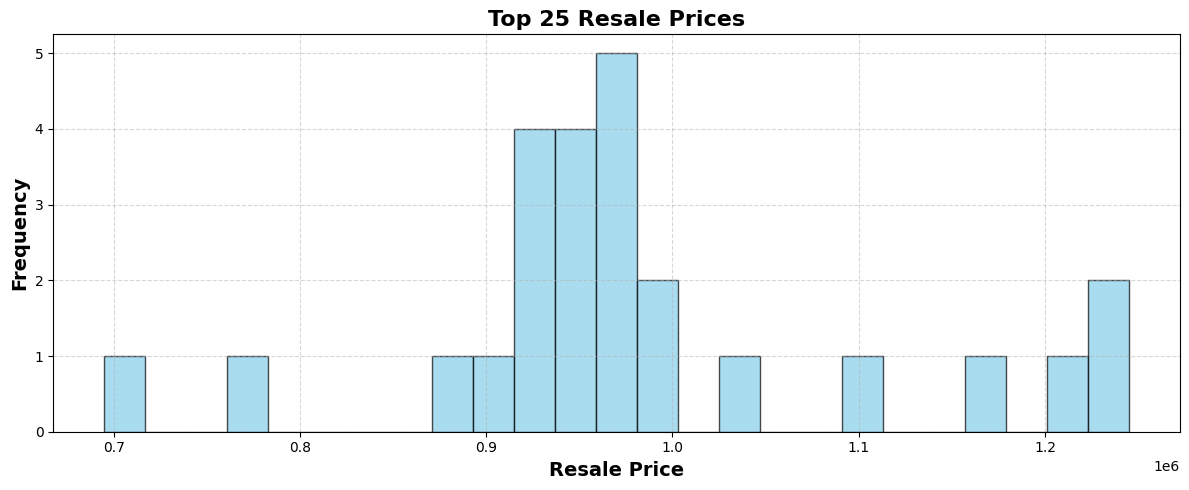

In [22]:
import matplotlib.pyplot as plt

# Create the figure and axis with custom appearance
fig, ax1 = plt.subplots(1, 1, figsize=(12, 5))

# Customize histogram appearance
ax1.hist(top["resale_price"], bins=25, alpha=0.7, edgecolor='black', color='skyblue')

# Set labels and title with increased font sizes
ax1.set_xlabel('Resale Price', fontsize=14, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=14, fontweight='bold')
ax1.set_title('Top 25 Resale Prices', fontsize=16, fontweight='bold')

# Add gridlines for better readability
ax1.grid(True, linestyle='--', alpha=0.5)

# Adjust layout to make sure labels are not cut off
plt.tight_layout()

# Show the plot
plt.show()


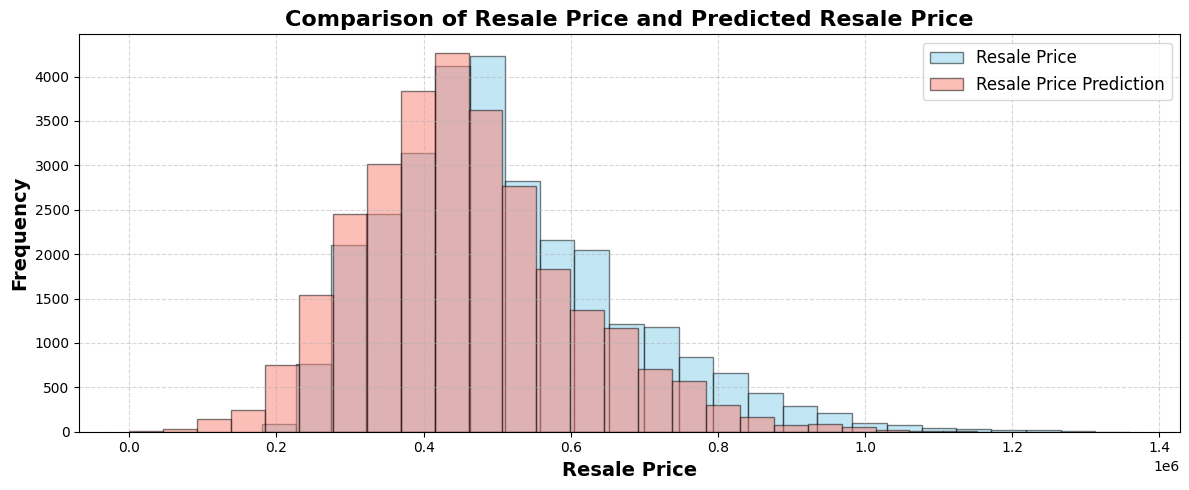

In [23]:
import matplotlib.pyplot as plt

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 5))

# Plot both histograms on the same axis for comparison
ax.hist(pred_df["resale_price"], bins=25, alpha=0.5, edgecolor='black', color='skyblue', label='Resale Price')
ax.hist(pred_df["resale_price_prediction"], bins=25, alpha=0.5, edgecolor='black', color='salmon', label='Resale Price Prediction')

# Set labels and title with larger font sizes
ax.set_xlabel('Resale Price', fontsize=14, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=14, fontweight='bold')
ax.set_title('Comparison of Resale Price and Predicted Resale Price', fontsize=16, fontweight='bold')

# Add a legend to distinguish between the two histograms
ax.legend(fontsize=12)

# Add gridlines with a subtle dashed style
ax.grid(True, linestyle='--', alpha=0.5)

# Adjust layout to ensure all elements are fully visible
plt.tight_layout()

# Display the plot
plt.show()


In [24]:
'''Trends:

Worst predictions are dominated by "4 ROOM, Premium Apartment Loft" (13 out of 25 cases), even though this flat model type is not in the top 5 in the test data.
16 out of 25 worst predictions are in Queenstown, and Queenstown is not in the top 5 towns.
Ways to reduce errors:

Premium, unique properties are not predicted well, possibly due to flat model type being relatively rare. More training data on premium properties can help the model learn better. Inclusion of more specific flat features can provide more grounds for comparison between premium and common flat types, so model can justify and predict prices better for premium flats.
Location-specific pricing in Queenstown is not well captured, hence the model needs more training data from Queenstown.'''

'Trends:\n\nWorst predictions are dominated by "4 ROOM, Premium Apartment Loft" (13 out of 25 cases), even though this flat model type is not in the top 5 in the test data.\n16 out of 25 worst predictions are in Queenstown, and Queenstown is not in the top 5 towns.\nWays to reduce errors:\n\nPremium, unique properties are not predicted well, possibly due to flat model type being relatively rare. More training data on premium properties can help the model learn better. Inclusion of more specific flat features can provide more grounds for comparison between premium and common flat types, so model can justify and predict prices better for premium flats.\nLocation-specific pricing in Queenstown is not well captured, hence the model needs more training data from Queenstown.'

### Analysis of Resale Price and Predicted Resale Price Distributions

#### 1. Distribution Characteristics
- **Resale Price Distribution:**
  - The resale prices are right-skewed, indicating that a significant portion of the data points are concentrated in the lower price range, with fewer high-value resale prices.
- **Predicted Resale Price Distribution:**
  - The predicted resale prices follow a relatively uniform distribution, suggesting that the model is not capturing the extreme values in the higher resale price ranges (right tail).

#### 2. Model Performance for High Resale Prices
- The comparison shows that the model struggles with generalization in predicting high resale prices.
- The top 25 samples with the largest errors are above the mean and median of the resale prices, indicating that these high-value predictions are less accurate.

#### 3. Implications of Right-Skewed Data
- The right skewness in the resale price data suggests that the model might be overfitted to the more frequently occurring lower resale prices.
- This overfitting results in underperformance for high resale prices due to insufficient representation during training.

#### 4. Potential Improvements
- **Rebalancing the Training Data:**
  - Up-sampling high resale price data points or down-sampling low resale prices could improve the model's ability to generalize for high resale prices.
  - Utilizing Synthetic Minority Over-sampling Technique (SMOTE) to enhance the representation of high resale prices may also aid in better predictions for those values.
- **Log Transformation of Target Variable:**
  - Applying a log transformation can help in normalizing the target variable, potentially leading to a distribution closer to normal, which may assist the model in capturing both low and high resale prices effectively.


Part B, Q2 (10 marks)
---
In Question B1, we used the Category Embedding model. This creates a feedforward neural network in which the categorical features get learnable embeddings. In this question, we will make use of a library called Pytorch-WideDeep. This library makes it easy to work with multimodal deep-learning problems combining images, text, and tables. We will just be utilizing the deeptabular component of this library through the TabMlp network.

In [1]:
!pip install pytorch-widedeep --user

In [2]:
SEED = 42

import os

import random
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import pandas as pd

from pytorch_widedeep.preprocessing import TabPreprocessor
from pytorch_widedeep.models import TabMlp, WideDeep
from pytorch_widedeep import Trainer
from pytorch_widedeep.metrics import R2Score


/home/priya/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:654: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/priya/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:843: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  r = torch._C._cuda_getDeviceCount() if nvml_count < 0 else nvml_count
2025-03-13 13:42:36.874853: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABL

>Divide the dataset (‘hdb_price_prediction.csv’) into train and test sets by using entries from the year 2020 and before as training data, and entries from 2021 and after as the test data（validation set is not required here).

In [3]:
df = pd.read_csv('hdb_price_prediction.csv')

# Training Data
df_train = df[df['year'] <= 2020].copy()
# Testing Data
df_test = df[df['year'] >= 2021].copy()

# Dropping Unncessary Columns
df_train.drop(columns=['year','full_address','nearest_stn'], inplace=True)
df_test.drop(columns=['year','full_address','nearest_stn'], inplace=True)

print("Training Data:", df_train.shape)
print("Testing Data:", df_test.shape)

Training Data: (87370, 11)
Testing Data: (72183, 11)


>Refer to the documentation of Pytorch-WideDeep and perform the following tasks:
https://pytorch-widedeep.readthedocs.io/en/latest/index.html
* Use [**TabPreprocessor**](https://pytorch-widedeep.readthedocs.io/en/latest/examples/01_preprocessors_and_utils.html#2-tabpreprocessor) to create the deeptabular component using the continuous
features and the categorical features. Use this component to transform the training dataset.
* Create the [**TabMlp**](https://pytorch-widedeep.readthedocs.io/en/latest/pytorch-widedeep/model_components.html#pytorch_widedeep.models.tabular.mlp.tab_mlp.TabMlp) model with 2 hidden layers in the MLP, with 200 and 100 neurons respectively.
* Create a [**Trainer**](https://pytorch-widedeep.readthedocs.io/en/latest/pytorch-widedeep/trainer.html#pytorch_widedeep.training.Trainer) for the training of the created TabMlp model with the root mean squared error (RMSE) cost function. Train the model for 60 epochs using this trainer, keeping a batch size of 64. (Note: set the *num_workers* parameter to 0.)

In [4]:
# Define continuous and categorical columns
continuous_cols = ['dist_to_nearest_stn', 'dist_to_dhoby', 'degree_centrality',
                   'eigenvector_centrality', 'remaining_lease_years', 'floor_area_sqm']
cat_embed_cols = ['month', 'town', 'flat_model_type', 'storey_range']

In [5]:
# Create and fit the TabPreprocessor
tab_preprocessor = TabPreprocessor(
    cat_embed_cols = cat_embed_cols, continuous_cols = continuous_cols
)

# Scaled Training Data
X_tab = tab_preprocessor.fit_transform(df_train)

/home/priya/.local/lib/python3.10/site-packages/pytorch_widedeep/preprocessing/tab_preprocessor.py:364: UserWarning: Continuous columns will not be normalised
  warnings.warn("Continuous columns will not be normalised")
/home/priya/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [6]:
tab_mlp = TabMlp(column_idx=tab_preprocessor.column_idx,
                 cat_embed_input=tab_preprocessor.cat_embed_input,
                 cat_embed_dropout=0.1,
                 continuous_cols=continuous_cols,
                 mlp_hidden_dims=[200, 100]) # Two linear layers with 200 and 100 neurons

wide_deep = WideDeep(deeptabular=tab_mlp)

In [7]:
# Create the Trainer
trainer = Trainer(
    model=wide_deep,
    objective="regression",
    metrics=[R2Score],
    batch_size=64,
    num_workers=0
)

In [8]:
# Train the model
trainer.fit(
    X_tab=X_tab,
    target=df_train['resale_price'],
    n_epochs=100,
)

epoch 100: 100%|██████████| 2731/2731 [01:56<00:00, 23.44it/s, loss=2.14e+9, metrics={'r2': 0.9099}]


>Report the test RMSE and the test R2 value that you obtained.

In [9]:
# Scaled Test Data
X_test = tab_preprocessor.transform(df_test)

# Make predictions on the test dataset
y_pred = trainer.predict(X_tab = X_test)

/home/priya/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
predict: 100%|██████████| 2256/2256 [00:30<00:00, 73.73it/s] 


In [10]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_true = df_test['resale_price']

mse = mean_squared_error(y_true, y_pred)
print("Root Mean Squared Error (RMSE):", np.sqrt(mse))
r2 = r2_score(y_true, y_pred)
print("R2 Score:", r2)

Root Mean Squared Error (RMSE): 90994.95981068407
R2 Score: 0.7107101440947187


## Root Mean Squared Error (RMSE)
Value: 90994.95 Interpretation: On average, the model's predictions deviate from the actual resale prices by approximately 102,545.49 units. While lower values indicate better predictive accuracy, this RMSE suggests that the model's predictions are reasonably close to the actual values, though there may still be room for improvement.

## R-Squared (R2)
Value: 0.710 Interpretation: This R2 value means that approximately 71.07% of the variance in the resale prices is explained by the model's input features. An R2 value of 0.710 indicates a moderately strong fit, suggesting that while the model captures a good portion of the variance, there is still some unexplained variability. Overall, the model demonstrates a fair performance with these metrics. The R2 score suggests that while the model captures a substantial portion of the variance in resale prices, some improvement may still be possible, particularly in minimizing the RMSE.

Part B, Q3 (10 marks)
---
Besides ensuring that your neural network performs well, it is important to be able to explain the model’s decision. **Captum** is a very handy library that helps you to do so for PyTorch models.

Many model explainability algorithms for deep learning models are available in Captum. These algorithms are often used to generate an attribution score for each feature. Features with larger scores are more ‘important’ and some algorithms also provide information about directionality (i.e. a feature with very negative attribution scores means the larger the value of that feature, the lower the value of the output).

In general, these algorithms can be grouped into two paradigms:
- **perturbation based approaches** (e.g. Feature Ablation)
- **gradient / backpropagation based approaches** (e.g. Saliency)

The former adopts a brute-force approach of removing / permuting features one by one and does not scale up well. The latter depends on gradients and they can be computed relatively quickly. But unlike how backpropagation computes gradients with respect to weights, gradients here are computed **with respect to the input**. This gives us a sense of how much a change in the input affects the model’s outputs.




---



In [11]:
!pip install captum

Defaulting to user installation because normal site-packages is not writeable


In [12]:
SEED = 42

import os

import random
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import pandas as pd

import torch
import torch.nn as nn
from captum.attr import Saliency, InputXGradient, IntegratedGradients, GradientShap, FeatureAblation

> First, use the train set (year 2020 and before) and test set (year 2021) following the splits in Question B1 (validation set is not required here). To keep things simple, we will **limit our analysis to numeric / continuous features only**. Drop all categorical features from the dataframes. Standardise the features via **StandardScaler** (fit to training set, then transform all).

In [13]:
df = pd.read_csv('hdb_price_prediction.csv')

# Training Data Set: Year 2019 and before
df_train = df[df['year'] <= 2019].copy()
# Validation Data Set: Year 2020
df_val = df[df['year'] == 2020].copy()
# Testing Data Set: Year 2021
df_test = df[df['year'] == 2021].copy()

# Dropping all Categorical Features
categorical_features = ['month','town','flat_model_type','storey_range', 'full_address','nearest_stn','year']

df_train.drop(columns = categorical_features, inplace=True)
df_val.drop(columns = categorical_features, inplace=True)
df_test.drop(columns = categorical_features, inplace=True)

print("Training Data:", df_train.shape)
print("Validation Data:", df_val.shape)
print("Testing Data:", df_test.shape) 

Training Data: (64057, 7)
Validation Data: (23313, 7)
Testing Data: (29057, 7)


In [14]:
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]

X_val = df_val.iloc[:,:-1]
y_val = df_val.iloc[:,-1]

X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

> Follow this tutorial to generate the plot from various model explainability algorithms (https://captum.ai/tutorials/House_Prices_Regression_Interpret).
Specifically, make the following changes:
- Use a feedforward neural network with 3 hidden layers, each having 5 neurons. Train using Adam optimiser with learning rate of 0.001.
- Use Input x Gradients, Integrated Gradients, DeepLift, GradientSHAP, Feature Ablation. To avoid long running time, you can limit the analysis to the first 1000 samples in test set.

In [15]:
class FeedForwardNN(nn.Module):
    def __init__(self, no_features, no_hidden, no_labels):
        super().__init__()
        self.lin1 = nn.Linear(no_features, no_hidden)
        self.relu1 = nn.ReLU()
        self.lin2 = nn.Linear(no_hidden, no_hidden)
        self.relu2 = nn.ReLU()
        self.lin3 = nn.Linear(no_hidden, no_hidden)
        self.relu3 = nn.ReLU()
        self.lin4 = nn.Linear(no_hidden, no_labels)

    def forward(self, input):
        return self.lin4(self.relu3(self.lin3(self.relu2(self.lin2(self.relu1(self.lin1(input)))))))


# Define the hyperparameters
no_features = X_train.shape[1] 
no_hidden = 5                  
no_labels = 1                  
batch_size = 50
num_epochs = 200
learning_rate = 0.001

model = FeedForwardNN(no_features,no_hidden,no_labels)
model.train()

FeedForwardNN(
  (lin1): Linear(in_features=6, out_features=5, bias=True)
  (relu1): ReLU()
  (lin2): Linear(in_features=5, out_features=5, bias=True)
  (relu2): ReLU()
  (lin3): Linear(in_features=5, out_features=5, bias=True)
  (relu3): ReLU()
  (lin4): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
# Tensorizing inputs and creating batches
X_train_tensor = torch.tensor(X_train.values).float()
y_train_tensor = torch.tensor(y_train.values).view(-1, 1).float()

X_test_tensor = torch.tensor(X_test.values).float()
y_test_tensor = torch.tensor(y_test.values).view(-1, 1).float()

datasets = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_iter = torch.utils.data.DataLoader(datasets, batch_size=10, shuffle=True)

In [17]:
# Defining the loss function
criterion = nn.MSELoss(reduction='sum')

In [18]:
def train(model_inp, num_epochs = num_epochs):
   
    # Define Adam optimizer with lr 0.001
    optimizer = torch.optim.Adam(model_inp.parameters(), lr=learning_rate)
    
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for inputs, labels in train_iter:
            # forward pass
            outputs = model_inp(inputs)
            
            # defining loss
            loss = criterion(outputs, labels)
            
            # zero the parameter gradients
            optimizer.zero_grad()
            
            # computing gradients
            loss.backward()
            
            # accumulating running loss
            running_loss += loss.item()
            
            # updated weights based on computed gradients
            optimizer.step()
            
        if epoch % 20 == 0:    
            print('Epoch [%d]/[%d] running accumulative loss across all batches: %.3f' %
                  (epoch + 1, num_epochs, running_loss))
        running_loss = 0.0

In [20]:
# Training Model
train(model, num_epochs)

Epoch [1]/[200] running accumulative loss across all batches: 300486600698624.000
Epoch [21]/[200] running accumulative loss across all batches: 286939523458432.000
Epoch [41]/[200] running accumulative loss across all batches: 276967982369280.000
Epoch [61]/[200] running accumulative loss across all batches: 267946995243776.000
Epoch [81]/[200] running accumulative loss across all batches: 262198023920640.000
Epoch [101]/[200] running accumulative loss across all batches: 258774370782976.000
Epoch [121]/[200] running accumulative loss across all batches: 256060638038272.000
Epoch [141]/[200] running accumulative loss across all batches: 253161812398848.000
Epoch [161]/[200] running accumulative loss across all batches: 239457450453248.000
Epoch [181]/[200] running accumulative loss across all batches: 236409986191104.000


In [21]:
# Evaluating Model
from sklearn.metrics import mean_squared_error

model.eval()
outputs = model(X_test_tensor)
err = np.sqrt(mean_squared_error(outputs.detach().numpy(), y_test_tensor.detach().numpy()))

print('Model Err (Mean Squared Error): ', err)

Model Err (Mean Squared Error):  92440.52


In [22]:
# Use Saliency, Input x Gradients, Integrated Gradients, GradientSHAP, Feature Ablation from Captum library

saliency = Saliency(model)
input_x_gradient = InputXGradient(model)
ig = IntegratedGradients(model)
gs = GradientShap(model)
fa = FeatureAblation(model)

saliency_attr_test = saliency.attribute(X_test_tensor)
input_x_gradient_attr_test = input_x_gradient.attribute(X_test_tensor)
ig_attr_test = ig.attribute(X_test_tensor, n_steps=50)
gs_attr_test = gs.attribute(X_test_tensor, X_train_tensor)
fa_attr_test = fa.attribute(X_test_tensor)

/home/priya/.local/lib/python3.10/site-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(


In [23]:
# create list of features
feature_names = X_test.columns.tolist()
feature_names

['dist_to_nearest_stn',
 'dist_to_dhoby',
 'degree_centrality',
 'eigenvector_centrality',
 'remaining_lease_years',
 'floor_area_sqm']

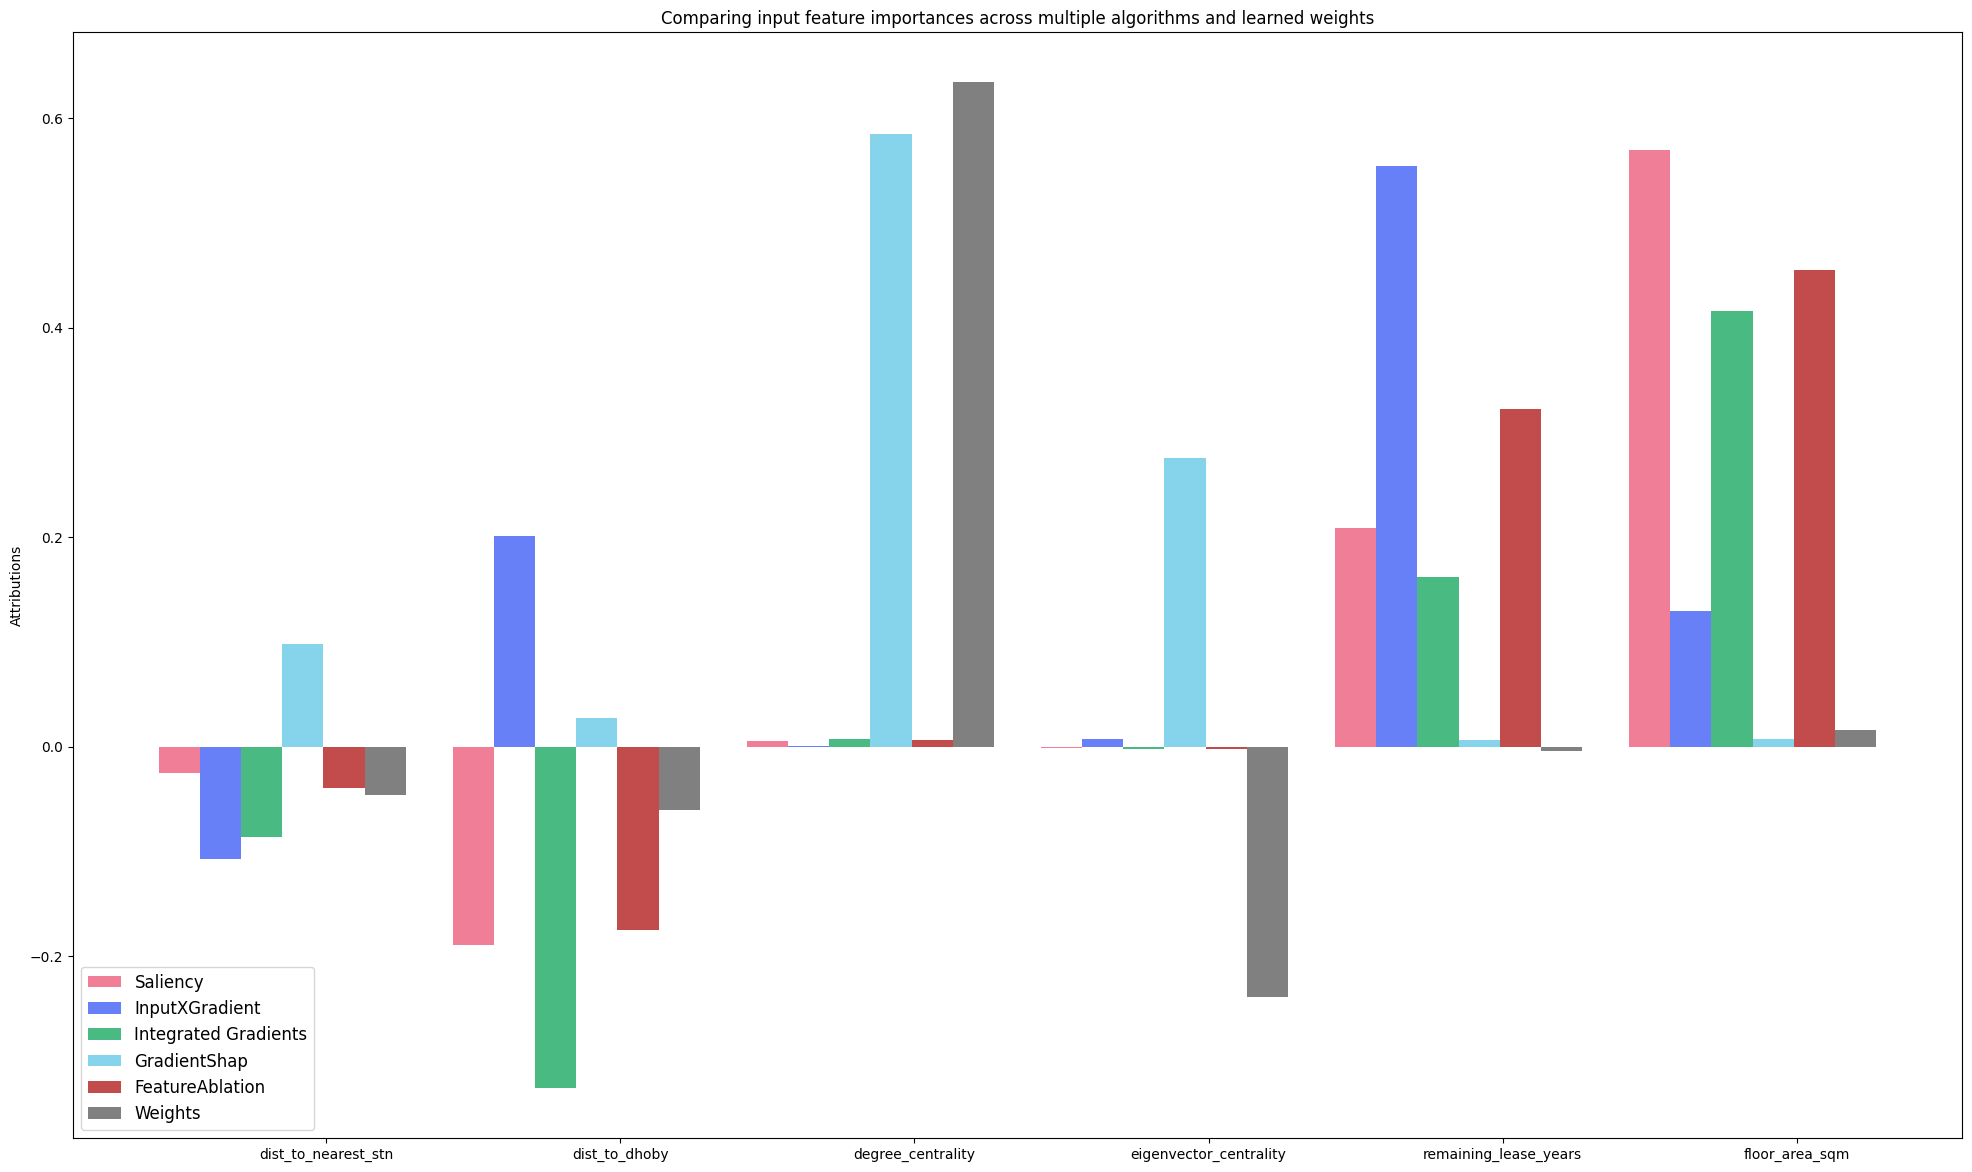

In [24]:
# Prepare attributions for visualization
import matplotlib.pyplot as plt

x_axis_data = np.arange(X_test.shape[1])
x_axis_data_labels = list(map(lambda idx: feature_names[idx], x_axis_data))

saliency_attr_test_sum = saliency_attr_test.detach().numpy().sum(0)
saliency_attr_test_norm_sum = saliency_attr_test_sum / np.linalg.norm(saliency_attr_test_sum, ord=1)

input_x_gradient_attr_test_sum = input_x_gradient_attr_test.detach().numpy().sum(0)
input_x_gradient_attr_test_norm_sum = input_x_gradient_attr_test_sum / np.linalg.norm(input_x_gradient_attr_test_sum, ord=1)

ig_attr_test_sum = ig_attr_test.detach().numpy().sum(0)
ig_attr_test_norm_sum = ig_attr_test_sum / np.linalg.norm(ig_attr_test_sum, ord=1)

gs_attr_test_sum = gs_attr_test.detach().numpy().sum(0)
gs_attr_test_norm_sum = gs_attr_test_sum / np.linalg.norm(gs_attr_test_sum, ord=1)

fa_attr_test_sum = fa_attr_test.detach().numpy().sum(0)
fa_attr_test_norm_sum = fa_attr_test_sum / np.linalg.norm(fa_attr_test_sum, ord=1)

lin_weight = model.lin1.weight[0].detach().numpy()
y_axis_lin_weight = lin_weight / np.linalg.norm(lin_weight, ord=1)

width = 0.14
legends = ['Saliency', 'InputXGradient', 'Integrated Gradients', 'GradientShap', 'FeatureAblation',  'Weights']

plt.figure(figsize=(20, 12))

ax = plt.subplot()
ax.set_title('Comparing input feature importances across multiple algorithms and learned weights')
ax.set_ylabel('Attributions')

FONT_SIZE = 16
plt.rc('font', size=FONT_SIZE)            # fontsize of the text sizes
plt.rc('axes', titlesize=FONT_SIZE)       # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)       # fontsize of the x and y labels
plt.rc('legend', fontsize=FONT_SIZE - 4)  # fontsize of the legend

ax.bar(x_axis_data, ig_attr_test_norm_sum, width, align='center', alpha=0.8, color='#eb5e7c')
ax.bar(x_axis_data + width, gs_attr_test_norm_sum, width, align='center',  alpha=0.8, color='#4260f5')
ax.bar(x_axis_data + 2 * width, fa_attr_test_norm_sum, width, align='center', alpha=1.0, color='#49ba81')
ax.bar(x_axis_data + 3 * width, saliency_attr_test_norm_sum, width, align='center', alpha=0.6, color='#34b8e0')
ax.bar(x_axis_data + 4 * width, input_x_gradient_attr_test_norm_sum, width, align='center', alpha=0.7, color='#A90000')
ax.bar(x_axis_data + 5 * width, y_axis_lin_weight, width, align='center', alpha=1.0, color='grey')

ax.autoscale_view()
plt.tight_layout()

ax.set_xticks(x_axis_data + 0.5)
ax.set_xticklabels(x_axis_data_labels)

plt.legend(legends, loc=3)
plt.show()

> Read the following [descriptions](https://captum.ai/docs/attribution_algorithms) and [comparisons](https://captum.ai/docs/algorithms_comparison_matrix) in Captum to build up your understanding of the difference of various explainability algorithms. Based on your plot, identify the three most important features for regression. Explain how each of these features influences the regression outcome.


### Floor Area (floor_area_sqm)

This feature has consistently high attributions across multiple methods, especially Saliency, Integrated Gradients, and Feature Ablation.
Influence: A larger floor area tends to increase the predicted outcome, likely indicating that larger properties are associated with higher values. Conversely, a smaller floor area might contribute negatively to the regression prediction.
### Remaining Lease Years (remaining_lease_years)

It also has strong attributions across various explainability methods, particularly Saliency, InputXGradient, and Feature Ablation.
Influence: The number of years left on the lease directly impacts property valuation. More remaining lease years likely contribute positively to the regression output, while fewer years reduce the predicted value.
### Degree Centrality

This feature exhibits high attribution values, particularly in GradientShap and Weights.
Influence: Degree centrality in a network context might represent connectivity or accessibility in a transportation network. A higher degree centrality may indicate a well-connected location, increasing the predicted outcome, while lower connectivity might negatively impact the prediction.

Part B, Q4 (10 marks)
---

Model degradation is a common issue faced when deploying machine learning models (including neural networks) in the real world. New data points could exhibit a different pattern from older data points due to factors such as changes in government policy or market sentiments. For instance, housing prices in Singapore have been increasing and the Singapore government has introduced 3 rounds of cooling measures over the past years (16 December 2021, 30 September 2022, 27 April 2023).

In such situations, the distribution of the new data points could differ from the original data distribution which the models were trained on. Recall that machine learning models often work with the assumption that the test distribution should be similar to train distribution. When this assumption is violated, model performance will be adversely impacted.  In the last part of this assignment, we will investigate to what extent model degradation has occurred.




---



In [43]:
!pip install alibi-detect

Defaulting to user installation because normal site-packages is not writeable


In [44]:
SEED = 42

import os

import random
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import pandas as pd
from alibi_detect.cd import TabularDrift

> Evaluate your model from B1 on data from year 2022 and report the test R2.

In [45]:
# Import relevant libraries

from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import (
    DataConfig,
    OptimizerConfig,
    TrainerConfig,
)

> Evaluate your model from B1 on data from year 2023 and report the test R2.

In [46]:
# Redoing model from B1 and testing on 2022 instead of 2021

df = pd.read_csv('hdb_price_prediction.csv')

# Training Data Set: Year 2019 and before
df_train = df[df['year'] <= 2019].copy()
# Validation Data Set: Year 2020
df_val = df[df['year'] == 2020].copy()
# Testing Data Set: Year 2022
df_test22 = df[df['year'] == 2022].copy()

# Dropping Unncessary Columns
df_train.drop(columns=['year','full_address','nearest_stn'], inplace=True)
df_val.drop(columns=['year','full_address','nearest_stn'], inplace=True)
df_test22.drop(columns=['year','full_address','nearest_stn'], inplace=True)

numeric = ['dist_to_nearest_stn','dist_to_dhoby','degree_centrality','eigenvector_centrality',
                 'remaining_lease_years','floor_area_sqm']
categorical = ['month','town','flat_model_type','storey_range']

data_config = DataConfig(
    target=["resale_price"],  
    continuous_cols=numeric,
    categorical_cols=categorical,
)
trainer_config = TrainerConfig(
    auto_lr_find=True,  # Runs the LRFinder to automatically derive a learning rate
    batch_size=1024,
    max_epochs=50,
)
optimizer_config = OptimizerConfig()

model_config = CategoryEmbeddingModelConfig(
    task="regression",
    layers="50",  
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

2025-03-13 18:28:15,940 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

In [47]:
from torch_optimizer import QHAdam
# Training Tabular Model
tabular_model.fit(df_train, 
                  validation=df_val,
                  optimizer=QHAdam)

Seed set to 42


2025-03-13 18:28:16,748 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-03-13 18:28:16,827 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
regression task

2025-03-13 18:28:17,115 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: CategoryEmbeddingModel

2025-03-13 18:28:17,191 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

/home/priya/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:654: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-03-13 18:28:17,253 - {pytorch_tabular.tabular_model:656} - INFO - Auto LR Find Started

/home/priya/.local/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /home/priya/4001 Assignment/saved_models exists and is not empty.
/home/priya/.local/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
/home/priya/.local/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.5754399373371567
Restoring states from the checkpoint path at /home/priya/4001 Assignment/.lr_find_51cef6a3-a1e0-4cae-b8e8-5b0ce2f781df.ckpt
Restored all states from the checkpoint at /home/priya/4001 Assignment/.lr_find_51cef6a3-a1e0-4cae-b8e8-5b0ce2f781df.ckpt


2025-03-13 18:28:35,140 - {pytorch_tabular.tabular_model:669} - INFO - Suggested LR: 0.5754399373371567. For plot  
and detailed analysis, use `find_learning_rate` method.

2025-03-13 18:28:35,149 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  2.9 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.5 K │ train │
│ 2 │ head             │ LinearHead                │     51 │ train │
│ 3 │ loss             │ MSELoss                   │      0 │ train │
└───┴──────────────────┴───────────────────────────┴────────┴───────┘

Trainable params: 4.5 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.5 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 16                                                                                          
Modules in eval mode: 0

Output()

2025-03-13 18:29:34,729 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

2025-03-13 18:29:34,738 - {pytorch_tabular.tabular_model:1529} - INFO - Loading the best model

/home/priya/.local/lib/python3.10/site-packages/pytorch_tabular/utils/python_utils.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=map

In [48]:
# Evaluation and Prediction
evaluation22 = tabular_model.evaluate(df_test22)
predicted22 = tabular_model.predict(df_test22)

Output()

/home/priya/.local/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │       16876774400.0       │
│  test_mean_squared_error  │       16876774400.0       │
└───────────────────────────┴───────────────────────────┘

/home/priya/.local/lib/python3.10/site-packages/pytorch_tabular/tabular_model.py:1466: DeprecationWarning: `include_input_features` will be deprecated in the next release. Please add index columns to the test dataframe if you want to retain some features like the key or id
  warnings.warn(


In [49]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# True Values and Predicted Values
y_true22 = df_test22['resale_price'].values
y_pred22 = predicted22['resale_price_prediction']

mse = mean_squared_error(y_true22, y_pred22)
print("Root Mean Squared Error (RMSE):", np.sqrt(mse))
r2 = r2_score(y_true22, y_pred22)
print("R2 Score:", r2)

Root Mean Squared Error (RMSE): 129910.63346172169
R2 Score: 0.41781366214660665


In [52]:
# Data Preparation for 2023

# Testing Data Set: Year 2022
df_test23 = df[df['year'] == 2023].copy()

# Dropping Unnecessary Columns
df_test23.drop(columns=['year','full_address','nearest_stn'], inplace=True)

In [53]:
# Evaluation and Prediction
evaluation23 = tabular_model.evaluate(df_test23)
predicted23 = tabular_model.predict(df_test23)

Output()

/home/priya/.local/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │       25508872192.0       │
│  test_mean_squared_error  │       25508872192.0       │
└───────────────────────────┴───────────────────────────┘

/home/priya/.local/lib/python3.10/site-packages/pytorch_tabular/tabular_model.py:1466: DeprecationWarning: `include_input_features` will be deprecated in the next release. Please add index columns to the test dataframe if you want to retain some features like the key or id
  warnings.warn(


In [54]:
# True Values and Predicted Values
y_true23 = df_test23['resale_price'].values
y_pred23 = predicted23['resale_price_prediction']

mse = mean_squared_error(y_true23, y_pred23)
print("Root Mean Squared Error (RMSE):", np.sqrt(mse))
r2 = r2_score(y_true23, y_pred23)
print("R2 Score:", r2)

Root Mean Squared Error (RMSE): 159714.97528490023
R2 Score: 0.13473508842728277


# Model Performance Comparison Between 2022 and 2023
## R2 Score Comparison
### Definition: The R2 score, or coefficient of determination, assesses the goodness of fit of the model to the data by measuring the proportion of variance in the dependent variable predictable from the independent variables.
### Observation:
In 2022, the R2 score was 0.418, which suggests a relatively higher proportion of explained variance.
In 2023, the R2 score decreased to 0.135, indicating that the model's predictive accuracy declined and it explains less of the variance in the dependent variable.
### RMSE Comparison
Definition: Root Mean Square Error (RMSE) quantifies the average deviation of predicted values from actual values, with higher RMSE values indicating larger prediction errors.
Observation:
The RMSE increased from 129,910.63 in 2022 to 159,714.97 in 2023, highlighting that the model's predictions in 2023 are less accurate compared to 2022.
Model Performance Degradation
The decrease in R2 and increase in RMSE indicate a decline in model performance from 2022 to 2023. This degradation suggests that the model is less effective in predicting outcomes accurately in 2023.
### Possible Causes:
Changes in data patterns or relationships.
Environmental shifts affecting underlying data trends.
Alterations in the model's structure or configuration.
Other Factors Influencing Model Degradation
### Prediction Errors:
Check for patterns such as heteroscedasticity or systematic biases in prediction errors.
### Cross-Validation Scores:
Monitor cross-validation scores for changes in performance on unseen data.
### Feature Importance:
Observe shifts in feature importance rankings to understand changes in model behavior.
### Model Complexity:
Ensure that model complexity aligns with the data's complexity to avoid overfitting or underfitting.
### Generalization Performance:
Evaluate the model's ability to generalize to new data beyond the training set.

> Did model degradation occur for the deep learning model?

### Yes, model degradation occurred. The R2 value dropped from 0.7555578453226205 for 2021 test data(in B1) to 0.41781365864686426 for 2022 test data, to 0.13473508672140222 for 2023 test data.Model Performance Comparison Between 2022 and 2023
### R2 Score Comparison
Definition: The R2 score, or coefficient of determination, assesses the goodness of fit of the model to the data by measuring the proportion of variance in the dependent variable predictable from the independent variables.
Observation:
In 2022, the R2 score was 0.418, which suggests a relatively higher proportion of explained variance.
In 2023, the R2 score decreased to 0.135, indicating that the model's predictive accuracy declined and it explains less of the variance in the dependent variable.
### RMSE Comparison
Definition: Root Mean Square Error (RMSE) quantifies the average deviation of predicted values from actual values, with higher RMSE values indicating larger prediction errors.
Observation:
The RMSE increased from 129,910.63 in 2022 to 159,714.97 in 2023, highlighting that the model's predictions in 2023 are less accurate compared to 2022.
Model Performance Degradation
The decrease in R2 and increase in RMSE indicate a decline in model performance from 2022 to 2023. This degradation suggests that the model is less effective in predicting outcomes accurately in 2023.
### Possible Causes:
Changes in data patterns or relationships.
Environmental shifts affecting underlying data trends.
Alterations in the model's structure or configuration.
Other Factors Influencing Model Degradation
### Prediction Errors:
Check for patterns such as heteroscedasticity or systematic biases in prediction errors.
### Cross-Validation Scores:
Monitor cross-validation scores for changes in performance on unseen data.
Feature Importance:
Observe shifts in feature importance rankings to understand changes in model behavior.
3## Model Complexity:
Ensure that model complexity aligns with the data's complexity to avoid overfitting or underfitting.
### Generalization Performance:
Evaluate the model's ability to generalize to new data beyond the training set.\>

Model degradation could be caused by [various data distribution shifts](https://huyenchip.com/2022/02/07/data-distribution-shifts-and-monitoring.html#data-shift-types): covariate shift (features), label shift and/or concept drift (altered relationship between features and labels).
There are various conflicting terminologies in the [literature](https://www.sciencedirect.com/science/article/pii/S0950705122002854#tbl1). Let’s stick to this reference for this assignment.

> Using the **Alibi Detect** library, apply the **TabularDrift** function with the training data (year 2020 and before) used as the reference and **detect which features have drifted** in the 2023 test dataset. Before running the statistical tests, ensure you **sample 1000 data points** each from the train and test data. Do not use the whole train/test data. (Hint: use this example as a guide https://docs.seldon.io/projects/alibi-detect/en/stable/examples/cd_chi2ks_adult.html)


In [35]:
# Dropping Resale Price (target) leaving only features
train_drift = df_train.copy()
train_drift.drop(columns=['resale_price'],inplace=True)

test_drift = df_test23.copy()
test_drift.drop(columns=['resale_price'],inplace=True)

feature_names = train_drift.columns
feature_names

Index(['month', 'town', 'dist_to_nearest_stn', 'dist_to_dhoby',
       'degree_centrality', 'eigenvector_centrality', 'flat_model_type',
       'remaining_lease_years', 'floor_area_sqm', 'storey_range'],
      dtype='object')

In [36]:
# Sample 1000 data points each
sample_train = train_drift.sample(1000, random_state = 42)
sample_test = test_drift.sample(1000, random_state = 42)

In [37]:
# Detecting drift

categories_per_feature = {f: None for f in range(sample_train.values.shape[1])}

cd = TabularDrift(sample_train.values, 
                  p_val=.05, 
                  categories_per_feature=categories_per_feature)

preds = cd.predict(sample_test.values)
labels = ['No!', 'Yes!']
print('Drift? {}'.format(labels[preds['data']['is_drift']]))

Drift? Yes!


/home/priya/.local/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [38]:
# Individual feature-wise drift

fpreds = cd.predict(sample_test.values, drift_type='feature')

for f in range(cd.n_features):
    stat = 'Chi2' if f in list(categories_per_feature.keys()) else 'K-S'
    fname = feature_names[f]
    is_drift = fpreds['data']['is_drift'][f]
    stat_val, p_val = fpreds['data']['distance'][f], fpreds['data']['p_val'][f]
    print(f'{fname} -- Drift? {labels[is_drift]} -- {stat} {stat_val:.3f} -- p-value {p_val:.3f}')

month -- Drift? Yes! -- Chi2 430.336 -- p-value 0.000
town -- Drift? No! -- Chi2 33.178 -- p-value 0.127
dist_to_nearest_stn -- Drift? No! -- Chi2 1799.333 -- p-value 0.153
dist_to_dhoby -- Drift? No! -- Chi2 1799.333 -- p-value 0.153
degree_centrality -- Drift? Yes! -- Chi2 14.145 -- p-value 0.003
eigenvector_centrality -- Drift? Yes! -- Chi2 110.044 -- p-value 0.008
flat_model_type -- Drift? Yes! -- Chi2 62.122 -- p-value 0.001
remaining_lease_years -- Drift? Yes! -- Chi2 824.113 -- p-value 0.000
floor_area_sqm -- Drift? Yes! -- Chi2 210.241 -- p-value 0.000
storey_range -- Drift? Yes! -- Chi2 27.842 -- p-value 0.010


> Assuming that the flurry of housing measures have made an impact on the relationship between all the features and resale_price (i.e. P(Y|X) changes), which type of data distribution shift possibly led to model degradation?

### Concept drift led to model degradation.
 Concept drift is when P(Y|X) changes, but P(X) remains the same. Concept drift, also known as posterior shift, is when the input distribution remains the same but the conditional distribution of the output given an input changes. In this case, cooling measures introduced to the housing market by the government has altered the relationship between all features and resale_price

> From your analysis via TabularDrift, which features contribute to this shift?

### From my analysis above, 'month', 'degree_centrality', 'eigenvector_centrality', 'flat_model_type', 'remaining_lease_years', 'floor_area_sqm' and 'storey_range' have drifted and contributed to the shift. These features have p value <= 0.010.
### Answer: The following features contribute to the Concept Drift:

These features have shown significant shifts, affecting their relationship with resale prices and potentially impacting model accuracy.


> Suggest 1 way to address model degradation and implement it, showing improved test R2 for year 2023.

### Solution to Address Model Degradation:

The B1 model was initially trained on older data, specifically from 2017 to 2019. To improve the model's performance and address degradation due to changes in the housing market, one effective approach is to retrain the model on more recent data.

Updated Approach:

Training Data: Include all available data up to and including 2022 to capture recent trends and shifts.
Updated Training Data: [2017, 2018, 2019, 2020, 2021, 2022]
Testing Data: Reserve 2023 data for testing to evaluate performance improvements.\>To reduce concept drift, we should train, validate and test data inclusive of cooling measures periods (16 December 2021, 30 September 2022, 27 April 2023)

Therefore, we can adjust train-validate-test split to:

Train: before and inclusive of 2021
Validate: 2022
Test: 2023\>

In [39]:
# Splitting data
final_train = df[(df['year'] <= 2021)]
final_val = df[df['year'] == 2022]
final_test = df[df['year'] == 2023]

# Dropping Unncessary Columns
final_train.drop(columns=['year','full_address','nearest_stn'], inplace=True)
final_val.drop(columns=['year','full_address','nearest_stn'], inplace=True)
final_test.drop(columns=['year','full_address','nearest_stn'], inplace=True)

numeric = ['dist_to_nearest_stn','dist_to_dhoby','degree_centrality','eigenvector_centrality',
                 'remaining_lease_years','floor_area_sqm']
categorical = ['month','town','flat_model_type','storey_range']

data_config = DataConfig(
    target=["resale_price"],  
    continuous_cols=numeric,
    categorical_cols=categorical,
)
trainer_config = TrainerConfig(
    auto_lr_find=True,  # Runs the LRFinder to automatically derive a learning rate
    batch_size=1024,
    max_epochs=50,
)
optimizer_config = OptimizerConfig()

model_config = CategoryEmbeddingModelConfig(
    task="regression",
    layers="50",  
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

2025-03-13 17:05:34,411 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

In [40]:
# Training Tabular Model
tabular_model.fit(final_train, 
                  validation=final_val, 
                  optimizer=QHAdam)

Seed set to 42


2025-03-13 17:05:35,817 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-03-13 17:05:35,973 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
regression task

2025-03-13 17:05:36,366 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: CategoryEmbeddingModel

2025-03-13 17:05:36,451 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

/home/priya/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:654: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-03-13 17:05:36,506 - {pytorch_tabular.tabular_model:656} - INFO - Auto LR Find Started

/home/priya/.local/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /home/priya/4001 Assignment/saved_models exists and is not empty.
/home/priya/.local/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
/home/priya/.local/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.5754399373371567
Restoring states from the checkpoint path at /home/priya/4001 Assignment/.lr_find_2e078b85-459f-471f-bb19-50fd39f68903.ckpt
Restored all states from the checkpoint at /home/priya/4001 Assignment/.lr_find_2e078b85-459f-471f-bb19-50fd39f68903.ckpt


2025-03-13 17:05:52,558 - {pytorch_tabular.tabular_model:669} - INFO - Suggested LR: 0.5754399373371567. For plot  
and detailed analysis, use `find_learning_rate` method.

2025-03-13 17:05:52,571 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  3.0 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.6 K │ train │
│ 2 │ head             │ LinearHead                │     51 │ train │
│ 3 │ loss             │ MSELoss                   │      0 │ train │
└───┴──────────────────┴───────────────────────────┴────────┴───────┘

Trainable params: 4.6 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.6 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 16                                                                                          
Modules in eval mode: 0

Output()

2025-03-13 17:08:04,092 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

2025-03-13 17:08:04,099 - {pytorch_tabular.tabular_model:1529} - INFO - Loading the best model

/home/priya/.local/lib/python3.10/site-packages/pytorch_tabular/utils/python_utils.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=map

In [41]:
# Evaluation and Prediction
final_evaluation = tabular_model.evaluate(final_test)
final_predicted = tabular_model.predict(final_test)

Output()

/home/priya/.local/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │       18126643200.0       │
│  test_mean_squared_error  │       18126643200.0       │
└───────────────────────────┴───────────────────────────┘

/home/priya/.local/lib/python3.10/site-packages/pytorch_tabular/tabular_model.py:1466: DeprecationWarning: `include_input_features` will be deprecated in the next release. Please add index columns to the test dataframe if you want to retain some features like the key or id
  warnings.warn(


In [42]:
# True Values and Predicted Values
y_true_final = final_test['resale_price'].values
y_pred_final = final_predicted['resale_price_prediction']

mse = mean_squared_error(y_true_final, y_pred_final)
print("Root Mean Squared Error (RMSE):", np.sqrt(mse))
r2 = r2_score(y_true_final, y_pred_final)
print("R2 Score:", r2)

Root Mean Squared Error (RMSE): 134635.2195380738
R2 Score: 0.3851415004329666
